**Background and Context:**

Product categorization also referred to as product classification, is a field of study within natural language processing (NLP). It is also one of the biggest challenges for e-commerce companies. With the advancement of AI technology, researchers have been applying machine learning to product categorization problems.

Product categorization is the placement and organization of products into their respective categories. In that sense, it sounds simple: choose the correct department for a product. However, this process is complicated by the sheer volume of products on many e-commerce platforms. Furthermore, many products could belong to multiple categories. There are many reasons why product categorization is important for e-commerce and marketing. Through the accurate classification of your products, you can increase conversion rates, strengthen your search engine, and improve your site’s Google ranking.

A well-built product taxonomy allows customers to find what they are looking for quickly and easily. Making your site easy to navigate is one of the most important elements of your UX and will lead to higher conversion rates. Correctly categorizing products allows your search engine to fetch products quicker. As a result, you create a quicker and more accurate search engine. Once you have a strong product taxonomy in
place, this will allow you to create the relevant landing pages for your products. In turn, Google and other search engines will be able to index your site and your products more easily. In the end, this allows your products to rank higher on search engines, increasing the chance that customers find your site.

To help merchants choose the correct category, Amazon and other e-commerce companies have automated product categorization tools available. After simply inputting the title or a few words about the product, the system can automatically choose the correct category for you.

**Dataset:**

The dataset has the following features:

● Data Set Characteristics: Multivariate

● Number of Instances: 50424

● Number of classes: 4


**Objective:**

To implement the techniques learned as a part of the course.

In [1]:
# install and import necessary libraries.

#!pip install contractions

!pip install wordcloud

In [2]:
import random


import re, string, unicodedata                          # Import Regex, string and unicodedata - Used for Text PreProcessing.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization


import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus



C:\Users\amina\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Remove limits on maximum rows and columns as well as column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
data=pd.read_csv('ecommerce_dataset.csv')                             #Importing the data

In [5]:
data.head() # Read the top 5 rows of the data

Label  \
0               Household   
1               Household   
2               Household   
3  Clothing & Accessories   
4               Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

The dataset has plenty of unnecessary columns. So, I will choose only the relevant columns.

In [6]:
real_data_pipe=data.copy() # Copy the original data for version control

In [7]:
real_data=data.loc[:, ["Label","Text"]] # Locate and select only the relevant columns

In [8]:
real_data.head() # Now visualize the relevant columns - Label and Text.


Label  \
0               Household   
1               Household   
2               Household   
3  Clothing & Accessories   
4               Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [9]:
real_data.shape # Check the shape of the dataset

(50428, 2)

There are 50428 rows and 2 columns

In [10]:
real_data=pd.DataFrame(real_data)

In [11]:
real_data.duplicated().sum() # Check for duplicated observations

22623

There are 22623 duplicated observations

In [12]:
real_data=real_data[~real_data.duplicated()] # Remove duplicated observations

In [13]:
#tweets.duplicated(subset=None, keep='first').sum()
real_data.duplicated().sum()                  # Confirm duplicates are removed.

0

In [14]:
real_data.shape # Check shape of data after removing duplicates

(27805, 2)

There are 27805 rows and  2 columns.

In [15]:
real_data.info() # Check data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27805 entries, 0 to 50425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   27805 non-null  object
 1   Text    27804 non-null  object
dtypes: object(2)
memory usage: 651.7+ KB


## Strip html tags

In [16]:
def strip_html(words):
    soup = str(BeautifulSoup(words, "html.parser").get_text()) 
      
    return soup

In [17]:
def strip_html_2(words):
    new_words = []
    for word in words:
      soup = BeautifulSoup(word, "html.parser").get_text()  
      new_words.append(str(soup))
    return new_words

In [18]:
real_data['Text'] = real_data['Text'].apply(lambda x: strip_html(str(x)))

real_data.head(1)

Label  \
0  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Text  
0  Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories

In [19]:
real_data.sample(n=20)

Label  \
20488               Household   
40623  Clothing & Accessories   
10057               Household   
41668                   Books   
37732             Electronics   
11961               Household   
6901                    Books   
2755              Electronics   
5114              Electronics   
1928              Electronics   
49923             Electronics   
2611                Household   
15733  Clothing & Accessories   
14981               Household   
12577               Household   
25580             Electronics   
44222  Clothing & Accessories   
2473                Household   
7334   Clothing & Accessories   
15698                   Books   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Text  
20488                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        JVM Beauty Make Up Case and Cosmetic Set Suitcase,Durable Kit Hair Salon with 21 Pcs Makeup Accessories for Children Girls Color:Pink.   JVM Make Up Case And Cosmetic Set, Durable Beauty Kit Hair Salon with 21 Pcs Makeup Accessories for Children Girls Safe and Fun We created the complete make up salon for your little girl with lot of accessories for hours of fun. Moreover we recreated the salon to look like a real one but it is 100% fake and doesn't have real makeup in it so you don't have to worry while your child is playing with this toys, you will not mee

In [20]:
"""real_data=pd.DataFrame(real_data)
duplicated_data=data[data.duplicated(subset=None)]
pd.DataFrame(duplicated_data)"""

'real_data=pd.DataFrame(real_data)\nduplicated_data=data[data.duplicated(subset=None)]\npd.DataFrame(duplicated_data)'

In [21]:
data.shape

(50428, 204)

In [22]:
data["Label"].nunique() # Check unique labels of the dataset

7

In [23]:
real_data["Label"].nunique()

7

Seven (7) labels are showing instead of four (4). I will fix this shortly.

In [24]:
real_data.reset_index() # Reset dataframe index

In [25]:
real_data["Label"].value_counts(0) # Visualise the labels

Household                                                                                                                                                                     10563
Books                                                                                                                                                                          6256
Clothing & Accessories                                                                                                                                                         5675
Electronics                                                                                                                                                                    5308
 our lives in our own hands. 2Certainty Is an IllusionNothing will ever separate us. We will probably be married another ten years.Elizabeth Taylor                               1
cularists have little personal experience of religion and can be strikingly ignorant on religious  s

The label contains some noise which would be cleaned to make sure the number of labels is 4.

In [26]:
def process_main_data(real_data,Label):   # Function to clean the text to remove duplicates and label to have four labels only.
    list_label=['Household','Books','Clothing & Accessories', 'Electronics']
    text_label=[]
    for i,j in enumerate(real_data["Label"]):
      if j not in list_label:
        j='not_found'
        text_label.append(i)
    real_data_drop=real_data.drop(index=real_data.iloc[text_label].index)
    real_data_drop=real_data_drop[~real_data_drop.duplicated()]
    real_data_drop=real_data_drop.loc[:, ["Label","Text"]]
    return real_data_drop

In [27]:
real_data_drop=process_main_data(real_data,'Label')

In [28]:
created_data=process_main_data(real_data_pipe,'Label')

In [29]:
created_data.head(1)

Label  \
0  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Text  
0  Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories

In [30]:
def process_test_data(real_data):                     # Function to create test data and remove duplicates
    real_data_drop=real_data[~real_data.duplicated()]
    real_data_drop=real_data_drop.loc[:, ["Text"]]
    return real_data_drop

In [31]:
test_data_pipe=process_test_data(real_data_pipe)   # real_data_pipe is uncleaned dataset

                                               # The function will take only the Text column and store for further model testing


In [32]:
test_data_pipe.head(1)                      # Visualize the data stored for future testing

Text
0  Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories

In [33]:
test_data_pipe.shape                   # Test the shape of the data to confirm it's only a single column

(27805, 1)

Shape of one of the test data in this project is 27805 rows and 1 column.

### Missing Value analysis

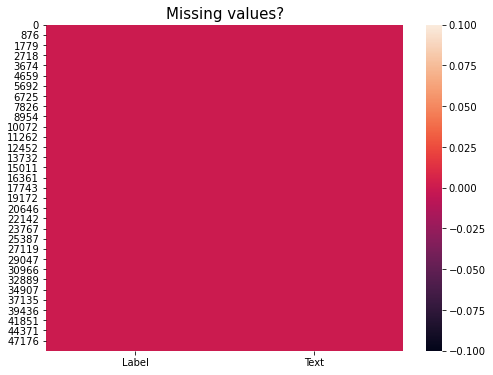

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(real_data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- Based on the above plot, we can say as there are no missing values in "Label" and "Text" columns.


In [35]:
real_data.isna().sum()     # To confirm there is no null or missing values in the dataset 


Label    0
Text     0
dtype: int64

No missing or null label and text.

The below function, will give these output in Dataframe

- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [36]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(real_data)

Your selected dataframe has 2 columns and 27805 Rows.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

In [37]:
real_data.describe(include="all")                         # Describe the dataset to check the distribution of the data                      


Label   Text
count       27805  27805
unique          7  27804
top     Household   1974
freq        10563      2

There are 27805 observations, 27804 unique text ( or observations). Majority of the Labels is for household

In [38]:
real_data_drop.describe(include="all")   # Describe the dataset to check the distribution of the preprocessed data                      


Label  \
count       27802   
unique          4   
top     Household   
freq        10563   

                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
count                                                                                                                                                                                                                                                                                                                                                                                                                                       27802  
unique                                                                                                                                                                                                                                                                                                                                                                                                                                      27802  
top     Home Sizzler 2 Piece Eyelet Polyester Door Curtain - 7ft (84 inch), Brown Item Package Quantity:2                                                                                 |                            Size:Door - 7 feet   Add a touch of sophistication to your living room interiors by getting this curtains by Home Sizzler. Made from polyester, these curtains are extremely fine in quality and can be maintained easily.  
freq                                                                                                                                                                                                                                                                                                                                                                                                                                            1

We now have 4 unique labels as expected.

In [39]:
list_label=['Household','Books','Clothing & Accessories', 'Electronics'] # Expected labels


In [40]:
# replace the label for better coding practice
real_data['Label'].replace({'Clothing & Accessories': 'Clothing_and_Accessories'},inplace=True) 

In [41]:
real_data.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [42]:
real_data_drop['Label'].replace({'Clothing & Accessories': 'Clothing_and_Accessories'},inplace=True)

In [43]:
real_data_drop.head(5)

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Text(0.5, 0.98, 'Characters in message')

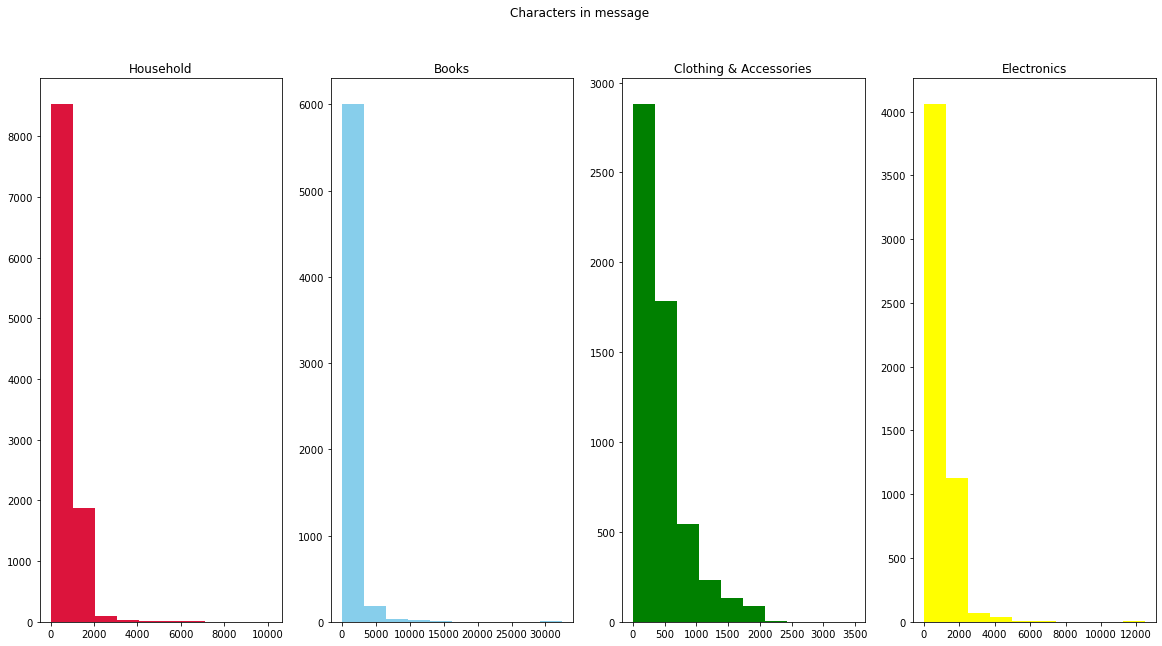

In [44]:
#Number of characters in tweets
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Household']['Text'].str.len()
ax1.hist(real_data_drop_len,color='crimson')
ax1.set_title('Household')
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Books']['Text'].str.len()
ax2.hist(real_data_drop_len,color='skyblue')
ax2.set_title('Books')
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Clothing_and_Accessories']['Text'].str.len()
ax3.hist(real_data_drop_len,color='green')
ax3.set_title('Clothing & Accessories')
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Electronics']['Text'].str.len()
ax4.hist(real_data_drop_len,color='yellow')
ax4.set_title('Electronics')
fig.suptitle('Characters in message')

For the Household label, the majority of characters in the Text column for each observation is less than 2000 characters; For the Books label, the majority of characters in the Text column for each observation is less than 5000 characters; For the Clothing & Accessories label, the majority of characters in the Text column for each observation is less than 750 characters; For the Electronics label, the majority of characters in the Text column for each observation is less than 2000 characters.

The Household and Electronics labels have similar characters distribution.

Text(0.5, 0.98, 'Words in a tweet')

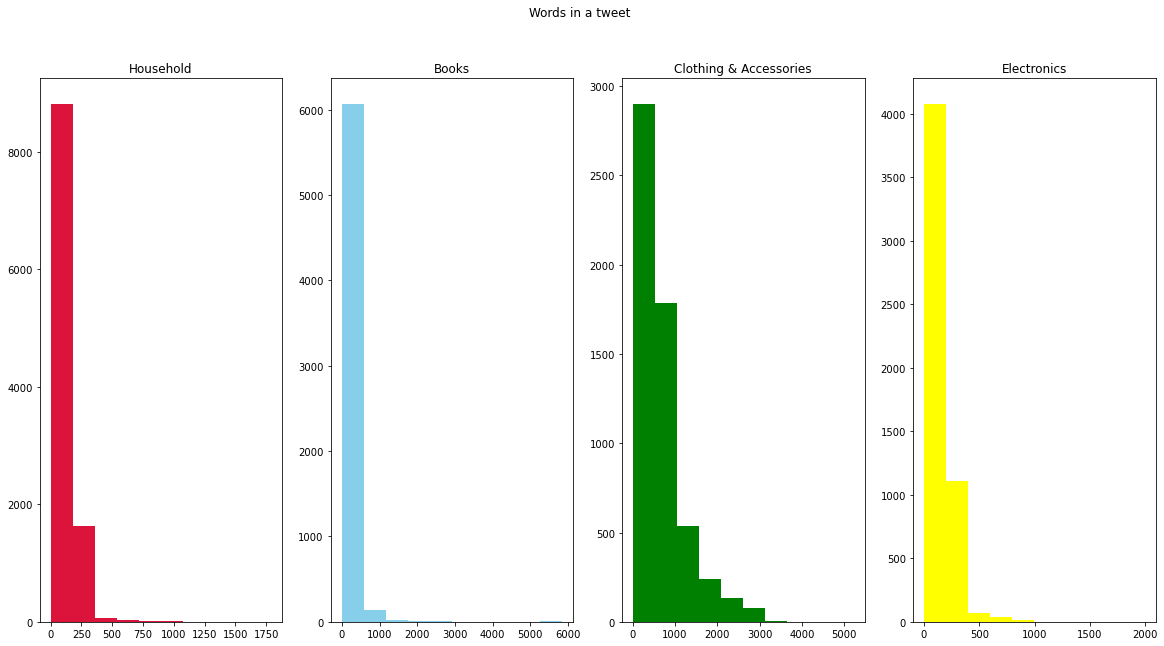

In [45]:
#Number of characters in tweets
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Household']['Text'].str.split().map(lambda x: len(x))
ax1.hist(real_data_drop_len,color='crimson')
ax1.set_title('Household')
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Books']['Text'].str.split().map(lambda x: len(x))
ax2.hist(real_data_drop_len,color='skyblue')
ax2.set_title('Books')
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Clothing_and_Accessories']['Text'].str.split().map(lambda x: len(str(x)))
ax3.hist(real_data_drop_len,color='green')
ax3.set_title('Clothing & Accessories')
real_data_drop_len = real_data_drop[real_data_drop['Label']=='Electronics']['Text'].str.split().map(lambda x: len(x))
ax4.hist(real_data_drop_len,color='yellow')
ax4.set_title('Electronics')
fig.suptitle('Words in a tweet')



For the Household label, the majority of words in the Text column for each observation is less than 250 words; For the Books label, the majority of words in the Text column for each observation is less than 1000 words; For the Clothing & Accessories label, the majority of words in the Text column for each observation is less than 1500 words; For the Electronics label, the majority of words in the Text column for each observation is less than 500 words.

The Household and Electronics labels have fewer number of words in each observation.

In [46]:
real_data_drop.head()  # Let's visualize the most current data again before further preprocessing

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [47]:
real_data_new=real_data_drop.copy()

In [48]:
real_data_new.shape

(27802, 2)

So, the most current data after removing duplicates and before removing noises has 27802 rows and 2 columns. 

## Preprocessing Texts

In [49]:
# Removal of the http link using Regular Expression.
for i, row in real_data_new.iterrows():
    clean_tweet = re.sub(r"http\S+", "", str(real_data_new.at[i, 'Text']))
    real_data_new.at[i,'Text'] = clean_tweet
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [50]:
!pip install contractions

In [51]:
import contractions

#### Pre processing: Remove https

In [52]:
def remove_https(words):                                     # Function to remove https
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r"http\S+", "", str(word))
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [53]:
def remove_https_2(words):
    new_words = re.sub(r"http\S+", "", str(words))
    return new_words

In [54]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: remove_https_2(str(x)))


In [55]:
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

#### Pre processing: De-contraction of words

In [56]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(str(text))



In [57]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: replace_contractions(str(x)))


In [58]:
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they are leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [59]:
#real_data_new_reserved=real_data_new.copy()

In [60]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [61]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Pre Processing : Removal of number

In [62]:
def remove_digits(words):
  new_words = []                        # Create empty list to store pre-processed words.
  for word in words:
      new_word = re.sub(r'\d+', '', str(word))
      if new_word != '':
          new_words.append(new_word)    # Append processed words to new list.
  return new_words

In [63]:
def remove_digits_2(words):
    new_words = re.sub(r'\d+', '', str(words))
    return new_words

In [64]:
real_data_new['Text'] = real_data_new.apply(lambda row: remove_digits_2(str(row['Text'])), axis=1) 
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they are leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: cm x cm x cm Weight: .kg Material: steel Colour: white, black, or pink No. of hook:  +  (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [65]:
real_data_new_reserved=real_data_new.copy()

### Pre Processing - Tokenization

In [66]:
def word_tokenizing(words):
  new_words=nltk.word_tokenize(str(words))
  return new_words


In [67]:
real_data_new['Text'] = real_data_new.apply(lambda row: word_tokenizing(str(row['Text'])), axis=1) # Tokenization of data
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  
0  [Styleys, Wrought, Iron, Coat, Rack, Hanger, Creative, Fashion, Bedroom, for, Hanging, Clothes, Shelves, ,, Wrought, Iron, Racks, Standing, Coat, Rack, (, Black, ), Color, Name, :, Black, Styleys, Coat, Stand, is, great, for, homes, and, rooms, with, limited, space, ,, as, having, one, standing, rack, takes, up, less, space, compared, to, drawers, and, cupboards, ., Easy, for, guests, to, keep, their, items, ,, especially, bags, and, scarves, ,, when, visiting, ,, as, they, can, always, keep, an, eye, on, it, and, easily, grab, it, when, they, are, leaving, ., Makes, a, smart, décor, piece, for, your, home, or, room, as, ...]  
1                                                                                                                                                                                                                                                                                                       [Cuisinart, CCO-BKN, Deluxe, Electric, Can, Opener, ,, Black, Size, :, None, |, Color, Name, :, Black, Style, ,, convenience, ,, and, power, come, together, in, the, Cuisinart, electric, can, open, ., With, chrome, accents, and, elegant, contours, ,, it, fits, nicely, with, other, modern, countertop, appliances, ., The, easy, single-touc]  
2                                                                                                                                                                                                                                                                                                                                                                                                       [Anchor, Penta, Amp, -Way, Switch, (, White, ), -, Pack, of, Anchor, Penta, Amp, -Way, Switch, (, White, ), -, Pack, of, comes, with, Spark, Shield, -, Concealed, Terminals, -, Silver, Cadmium, Contacts, -, IP, Protection, -, Captive, Screw, .]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [Proline, Men, 's, Track, Jacket, Proline, Woven, ,, %, Polyester, High, neck, Wind, Cheater, with, colour, Blocked, Detail]  
4                    [Chef, 's, Garage, Slot, Edge, Grip, Kitchen, Knife, Sharpener, ,, Helps, to, Sharpen, The, Dull, Knives, (, Black, ), Chef, 's, Garage, Mini, Knife, sharpener, helps, to, sharpen, your, dull, knives, ., This, tiny, knife, sharpener, has, stage, sharpening, system, ., First, stage, is, for, damaged, and, dull, knives, ,, it, will, sharpen, the, knife, on, the, coarse, slot, ., The, coarse, slot, is, made, of, carbide, ., Second, stage, is, fine, slot, ,, once, you, have, honed, the, knife, on, coarse, slot, it, will, helps, to, give, the, finishing, touch, ., The, fine, slot, is, made, of, ceramic, for, ...]

### Preprocessing-Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [68]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []     
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [69]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: to_lowercase(x))
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  
0  [styleys, wrought, iron, coat, rack, hanger, creative, fashion, bedroom, for, hanging, clothes, shelves, ,, wrought, iron, racks, standing, coat, rack, (, black, ), color, name, :, black, styleys, coat, stand, is, great, for, homes, and, rooms, with, limited, space, ,, as, having, one, standing, rack, takes, up, less, space, compared, to, drawers, and, cupboards, ., easy, for, guests, to, keep, their, items, ,, especially, bags, and, scarves, ,, when, visiting, ,, as, they, can, always, keep, an, eye, on, it, and, easily, grab, it, when, they, are, leaving, ., makes, a, smart, décor, piece, for, your, home, or, room, as, ...]  
1                                                                                                                                                                                                                                                                                                       [cuisinart, cco-bkn, deluxe, electric, can, opener, ,, black, size, :, none, |, color, name, :, black, style, ,, convenience, ,, and, power, come, together, in, the, cuisinart, electric, can, open, ., with, chrome, accents, and, elegant, contours, ,, it, fits, nicely, with, other, modern, countertop, appliances, ., the, easy, single-touc]  
2                                                                                                                                                                                                                                                                                                                                                                                                       [anchor, penta, amp, -way, switch, (, white, ), -, pack, of, anchor, penta, amp, -way, switch, (, white, ), -, pack, of, comes, with, spark, shield, -, concealed, terminals, -, silver, cadmium, contacts, -, ip, protection, -, captive, screw, .]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [proline, men, 's, track, jacket, proline, woven, ,, %, polyester, high, neck, wind, cheater, with, colour, blocked, detail]  
4                    [chef, 's, garage, slot, edge, grip, kitchen, knife, sharpener, ,, helps, to, sharpen, the, dull, knives, (, black, ), chef, 's, garage, mini, knife, sharpener, helps, to, sharpen, your, dull, knives, ., this, tiny, knife, sharpener, has, stage, sharpening, system, ., first, stage, is, for, damaged, and, dull, knives, ,, it, will, sharpen, the, knife, on, the, coarse, slot, ., the, coarse, slot, is, made, of, carbide, ., second, stage, is, fine, slot, ,, once, you, have, honed, the, knife, on, coarse, slot, it, will, helps, to, give, the, finishing, touch, ., the, fine, slot, is, made, of, ceramic, for, ...]

## Preprocessing: Removal of Punctuation

In [70]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [71]:
def remove_punctuation_2(words):
    """Remove punctuation from list of tokenized words"""
    new_words = re.sub(r'[^\w\s]', '', str(words))
    return new_words

In [72]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: remove_punctuation(x))
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Text  
0  [styleys, wrought, iron, coat, rack, hanger, creative, fashion, bedroom, for, hanging, clothes, shelves, wrought, iron, racks, standing, coat, rack, black, color, name, black, styleys, coat, stand, is, great, for, homes, and, rooms, with, limited, space, as, having, one, standing, rack, takes, up, less, space, compared, to, drawers, and, cupboards, easy, for, guests, to, keep, their, items, especially, bags, and, scarves, when, visiting, as, they, can, always, keep, an, eye, on, it, and, easily, grab, it, when, they, are, leaving, makes, a, smart, décor, piece, for, your, home, or, room, as, occupied, stands, can, show, off, your, stylish, handbags, accessories, and, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                   [cuisinart, ccobkn, deluxe, electric, can, opener, black, size, none, color, name, black, style, convenience, and, power, come, together, in, the, cuisinart, electric, can, open, with, chrome, accents, and, elegant, contours, it, fits, nicely, with, other, modern, countertop, appliances, the, easy, singletouc]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [anchor, penta, amp, way, switch, white, pack, of, anchor, penta, amp, way, switch, white, pack, of, comes, with, spark, shield, concealed, terminals, silver, cadmium, contacts, ip, protection, captive, screw]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [proline, men, s, track, jacket, proline, woven, polyester, high, neck, wind, cheater, with, colour, blocked, detail]  
4                                          [chef, s, garage, slot, edge, grip, kitchen, knife, sharpener, helps, to, sharpen, the, dull, knives, black, chef, s, garage, mini, knife, sharpener, helps, to, sharpen, your, dull, knives, this, tiny, knife, sharpener, has, stage, sharpening, system, first, stage, is, for, damaged, and, dull, knives, it, will, sharpen, the, knife, on, the, coarse, slot, the, 

### Pre-Processing - Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [73]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stopwords = stopwords.words('english')
"""
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

#stopwords = list(set(stopwords) - set(customlist)) 
# Custom stop-word's list will not matter in this analysis as we are not interested in positive or negative sentiments.

 
"""
stopwords = list(set(stopwords)) 

In [75]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [76]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: remove_stopwords(x))
real_data_new.head(20)

Label  \
0                  Household   
1                  Household   
2                  Household   
3   Clothing_and_Accessories   
4                  Household   
5                  Household   
6                  Household   
7                Electronics   
8                Electronics   
9                  Household   
10                 Household   
11               Electronics   
12               Electronics   
13                 Household   
14                 Household   
15                 Household   
16                 Household   
17               Electronics   
18                 Household   
19                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Text  
0                                                                                                                                                           [styleys, wrought, iron, coat, rack, hanger, creative, fashion, bedroom, hanging, clothes, shelves, wrought, iron, racks, standing, coat, rack, black, color, name, black, styleys, coat, stand, great, homes, rooms, limited, space, one, standing, rack, takes, less, space, compared, drawers, cupboards, easy, guests, keep, items, especially, bags, scarves, visiting, always, keep, eye, easily, grab, leaving, makes, smart, décor, piece, home, room, occupied, stands, show, stylish, handbags, accessories, hangman, achievement, medals, dimensions, cm, x, cm, x, cm, weight, kg, material, steel, colour, white, black, pink, hook, straight, pegs, suitable, hang, coats, clothes, scarves, handbags, hats, accessories]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [cuisinart, ccobkn, deluxe, electric, opener, black, size, none, color, name, black, style, convenience, power, come, together, cuisinart, electric, open, chrome, accents, elegant, contours, fits, nicely, modern, countertop, appliances, easy, singletouc]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [anchor, penta, amp, way, switch, white, pack, anchor, penta, amp, w

#### Pre-Processing: Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [77]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [78]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [79]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [80]:
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
lemmatizer = WordNetLemmatizer()


In [82]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [83]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: lemmatize_list(x))
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Text  
0                                                                  [styleys, work, iron, coat, rack, hanger, creative, fashion, bedroom, hang, clothe, shelve, work, iron, rack, stand, coat, rack, black, color, name, black, styleys, coat, stand, great, home, room, limit, space, one, stand, rack, take, less, space, compare, drawers, cupboards, easy, guests, keep, items, especially, bag, scarves, visit, always, keep, eye, easily, grab, leave, make, smart, décor, piece, home, room, occupy, stand, show, stylish, handbags, accessories, hangman, achievement, medals, dimension, cm, x, cm, x, cm, weight, kg, material, steel, colour, white, black, pink, hook, straight, peg, suitable, hang, coat, clothe, scarves, handbags, hat, accessories]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [cuisinart, ccobkn, deluxe, electric, opener, black, size, none, color, name, black, style, convenience, power, come, together, cuisinart, electric, open, chrome, accent, elegant, contour, fit, nicely, modern, countertop, appliances, easy, singletouc]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [anchor, penta, amp, way, switch, white, pack, anchor, penta, amp, way, switch, white, pack, come, spark, shield, conceal, terminals, silver, cadmium, contact, ip, protection, captive, screw]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [proline, men, track, jacket, proline, weave, polyester, high, neck, wind, cheater, colour, block, detail]  
4  [chef, garage, slot, edge, grip, kitchen, knife, sharpener, help, sharpen, dull, knives, black, chef, garage, mini, knife,

#### Pre-Processing: Remove Non-ASCII


In [84]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [85]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: remove_non_ascii(x))
real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Text  
0                                                                  [styleys, work, iron, coat, rack, hanger, creative, fashion, bedroom, hang, clothe, shelve, work, iron, rack, stand, coat, rack, black, color, name, black, styleys, coat, stand, great, home, room, limit, space, one, stand, rack, take, less, space, compare, drawers, cupboards, easy, guests, keep, items, especially, bag, scarves, visit, always, keep, eye, easily, grab, leave, make, smart, decor, piece, home, room, occupy, stand, show, stylish, handbags, accessories, hangman, achievement, medals, dimension, cm, x, cm, x, cm, weight, kg, material, steel, colour, white, black, pink, hook, straight, peg, suitable, hang, coat, clothe, scarves, handbags, hat, accessories]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [cuisinart, ccobkn, deluxe, electric, opener, black, size, none, color, name, black, style, convenience, power, come, together, cuisinart, electric, open, chrome, accent, elegant, contour, fit, nicely, modern, countertop, appliances, easy, singletouc]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [anchor, penta, amp, way, switch, white, pack, anchor, penta, amp, way, switch, white, pack, come, spark, shield, conceal, terminals, silver, cadmium, contact, ip, protection, captive, screw]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [proline, men, track, jacket, proline, weave, polyester, high, neck, wind, cheater, colour, block, detail]  
4  [chef, garage, slot, edge, grip, kitchen, knife, sharpener, help, sharpen, dull, knives, black, chef, garage, mini, knife,

#### Pre-Processing: Remove apostrophe or other non-lowercase alphabets after other preprocessing 

In [86]:
def remove_apostrophe(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^a-z]+', '', word)
        new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [87]:
real_data_new['Text'] = real_data_new['Text'].apply(lambda x: remove_apostrophe(x))
real_data_new.sample(10)

Label  \
30740                     Books   
33008                     Books   
3227   Clothing_and_Accessories   
5162                      Books   
34955               Electronics   
12401  Clothing_and_Accessories   
11237               Electronics   
37019                 Household   
44737                 Household   
30876  Clothing_and_Accessories   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Text  
30740        [rrb, objective, mechanic, radio, tv, author, editorial, team, highly, skilled, professionals, arihant, work, hand, glove, ensure, students, receive, best, accurate, content, book, inception, till, book, come, print, whole, team, comprise, author, editors, proofreaders, various, involve, shape, book, put, best, efforts, knowledge, experience, produce, rigorous, content, students, receive, keep, mind, specific, requirements, students, various, examinations, carefully, design, exam, orient, exam, ready, content, come, intensive, research, analysis, experts, adopt, whole, new, style, present, content, easily, understandable, leave, behind, old, traditional, methods, use, effective, develop, latest, content, update, per, need, requirements, students, make, book, hallmark, quality, reliability, past, years]  
33008  [zen, golf, master, mental, game, publisher, senior, writer, golf, digest, describe, zen, golf, master, mental, game, soothe, enlighten, entertain, provocative, book, highly, original, excite, deserve, notice, may, zen, golf, release, hardcover, december, go, fifth, print, chart, current, bestselling, instructional, golf, book, america, response, many, request, audio, version, especially, listen, drive, golf, course, audiobook, produce, unabridged, edition, cd, set, attractive, jewel, case, read, author, pga, tour, instructor, dr, joseph, parent, convey, author, expressions, wisdom, many, golfers, level, find, zen, golf, fred, shoemaker, author, extraordinary, golf, write, dr, parent, beautifully, meld, timeless, wisdom, buddhism, timely, insights, golf, coach, roadmap, inner, confidence, selfawareness, ...]  
3227                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [chhota, bheem, boy, plain, regular, fit, tshirt, dress, favourite, super, hero, super, bheem, tshirt, fashion, passion]  
5162             [fist, god, booklist, saddam, hussein, confident, face, yous, un, military, might, perhaps, secret, weapon, unleash, armies, defend, kuwait, espionagemaster, forsyth, day, jackal, raise, question, intrigue, new, novel, saddam, appear, throughout, meet, cabinet, seem, mind, thousands, people, kill, battle, 

In [88]:
! pip install -U textblob
! python -m textblob.download_corpora

Finished.

C:\Users\amina\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll200


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [89]:
from textblob import TextBlob 
from textblob import Word

#### Pre-Processing: Auto-correct wrongly spelt words


In [90]:
def autocorrect_words(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word=str(TextBlob(word).correct())
        new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [91]:
#real_data_new['Text'] = real_data_new['Text'].apply(lambda x: autocorrect_words(x)) # Not needed in this project
#real_data_new.sample(10)

In [92]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [93]:
def word_tokenizing(words):
  new_words=nltk.word_tokenize(str(words))
  return new_words


#### Update data before normalizing

In [94]:
# To show raw data before normalizing and it contains Label and Text columns. Only duplicates and label feature column cleaned. 

new_real_data_pipe=process_main_data(real_data_pipe,'Label')

new_real_data_pipe_for_test=new_real_data_pipe.copy() 

In [95]:
# To show raw data before normalizing and it contains only Text column. Only duplicates cleaned.

new_test_data=process_test_data(real_data_pipe) 
new_test_data_display=new_test_data.copy()

#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [96]:

def normalize(words):
    words = strip_html(str(words))
    words=remove_https_2(str(words))
    words=replace_contractions(str(words))
    words=remove_digits_2(str(words))
    
    words=word_tokenizing(str(words))
    words=to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)

    words = remove_non_ascii(words)
    words=remove_apostrophe(words)
    #words=autocorrect_words(words)  # Not needed in this project - to maintain original intent of data collected
    
    return " ".join(words)
new_real_data_pipe['Text'] = new_real_data_pipe.apply(lambda row: normalize(str(row['Text'])), axis=1) #fairly cleaned data input

new_real_data_pipe.head()



Label  \
0               Household   
1               Household   
2               Household   
3  Clothing & Accessories   
4               Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                      styleys work iron coat rack hanger creative fashion bedroom hang clothe shelve work iron rack stand coat rack black color name black styleys coat stand great home room limit space one stand rack take less space compare drawers cupboards easy guests keep items especially bag scarves visit always keep eye easily grab leave make smart decor piece home room occupy stand show stylish handbags accessories hangman achievement medals dimension cm x cm x cm weight kg material steel colour white black pink hook straight peg suitable hang coat clothe scarves handbags hat accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cuisinart ccobkn deluxe electric opener black size none color name black style convenience power come together cuisinart electric open chrome accent elegant contour fit nicely modern countertop appliances easy singletouc  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [97]:
new_test_data['Text'] = new_test_data.apply(lambda row: normalize(str(row['Text'])), axis=1) #fairly cleaned data input

new_test_data.head()

Text
0                                                                                                                                                                                                                                                                                                                                                                                                                                      styleys work iron coat rack hanger creative fashion bedroom hang clothe shelve work iron rack stand coat rack black color name black styleys coat stand great home room limit space one stand rack take less space compare drawers cupboards easy guests keep items especially bag scarves visit always keep eye easily grab leave make smart decor piece home room occupy stand show stylish handbags accessories hangman achievement medals dimension cm x cm x cm weight kg material steel colour white black pink hook straight peg suitable hang coat clothe scarves handbags hat accessories
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cuisinart ccobkn deluxe electric opener black size none color name black style convenience power come together cuisinart electric open chrome accent elegant contour fit nicely modern countertop appliances easy singletouc
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    anchor penta amp way switch white pack anchor penta amp way switch white pack come spark shield conceal terminals silver cadmium contact ip protection captive screw
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             proline men track jacket proline weave polyester high neck wind cheater colour 

In [98]:
new_test_data_mod=new_test_data.copy()  # Copy normalized data

In [99]:
new_real_data_pipe['Label'].replace({'Clothing & Accessories': 'Clothing_and_Accessories'},inplace=True)

In [100]:
new_real_data_new=new_real_data_pipe.copy()

In [101]:
new_real_data_pipe_for_test_clean=new_real_data_pipe.copy() # To generate dataset to show cleaned text for train and test set

In [102]:
new_real_data_new_mod=new_real_data_new.copy()

In [103]:
new_real_data_new_mod_plot=new_real_data_new_mod.copy()

In [104]:
new_real_data_new.head(1)

Label  \
0  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Text  
0  styleys work iron coat rack hanger creative fashion bedroom hang clothe shelve work iron rack stand coat rack black color name black styleys coat stand great home room limit space one stand rack take less space compare drawers cupboards easy guests keep items especially bag scarves visit always keep eye easily grab leave make smart decor piece home room occupy stand show stylish handbags accessories hangman achievement medals dimension cm x cm x cm weight kg material steel colour white black pink hook straight peg suitable hang coat clothe scarves handbags hat accessories

In [105]:
new_real_data_new['Label'].replace({'Clothing & Accessories': 'Clothing_and_Accessories'},inplace=True)


In [106]:
new_real_data_new.head(10)

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   
5                 Household   
6                 Household   
7               Electronics   
8               Electronics   
9                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             styleys work iron coat rack hanger creative fashion bedroom hang clothe shelve work iron rack stand coat rack black color name black styleys coat stand great home room limit space one stand rack take less space compare drawers cupboards easy guests keep items especially bag scarves visit always keep eye easily grab leave make smart decor piece home room occupy stand show stylish handbags accessories hangman achievement medals dimension cm x cm x cm weight kg material steel colour white black pink hook straight peg suitable hang coat clothe scarves handbags hat accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   cuisinart ccobkn deluxe electric opener black size none color name black style convenience power come together cuisinart electric open chrome accent elegant contour fit nicely modern countertop appliances easy singletouc  
2                      

.**The most Common words in text column**

In [107]:
new_real_data_new['Text'] = new_real_data_new.apply(lambda row: nltk.word_tokenize(str(row['Text'])), axis=1) # Tokenization of data
top = Counter([item for sublist in new_real_data_new['Text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

###  Most common words in the labels

In [108]:
new_real_data_new.Label.value_counts()

Household                   10563
Books                        6256
Clothing_and_Accessories     5675
Electronics                  5308
Name: Label, dtype: int64

In [109]:
use_new_real_data_new=new_real_data_new.copy()

#### Create dataframes for each label

In [110]:
Household_sent = use_new_real_data_new[use_new_real_data_new['Label']=='Household']
Books_sent = use_new_real_data_new[use_new_real_data_new['Label']=='Books']
Clothing_sent = use_new_real_data_new[use_new_real_data_new['Label']=='Clothing_and_Accessories']
Electronics_sent = use_new_real_data_new[use_new_real_data_new['Label']=='Electronics']



In [111]:
use_new_real_data_new.head()

Label  \
0                 Household   
1                 Household   
2                 Household   
3  Clothing_and_Accessories   
4                 Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Text  
0                                                                  [styleys, work, iron, coat, rack, hanger, creative, fashion, bedroom, hang, clothe, shelve, work, iron, rack, stand, coat, rack, black, color, name, black, styleys, coat, stand, great, home, room, limit, space, one, stand, rack, take, less, space, compare, drawers, cupboards, easy, guests, keep, items, especially, bag, scarves, visit, always, keep, eye, easily, grab, leave, make, smart, decor, piece, home, room, occupy, stand, show, stylish, handbags, accessories, hangman, achievement, medals, dimension, cm, x, cm, x, cm, weight, kg, material, steel, colour, white, black, pink, hook, straight, peg, suitable, hang, coat, clothe, scarves, handbags, hat, accessories]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [cuisinart, ccobkn, deluxe, electric, opener, black, size, none, color, name, black, style, convenience, power, come, together, cuisinart, electric, open, chrome, accent, elegant, contour, fit, nicely, modern, countertop, appliances, easy, singletouc]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [anchor, penta, amp, way, switch, white, pack, anchor, penta, amp, way, switch, white, pack, come, spark, shield, conceal, terminals, silver, cadmium, contact, ip, protection, captive, screw]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [proline, men, track, jacket, proline, weave, polyester, high, neck, wind, cheater, colour, block, detail]  
4  [chef, garage, slot, edge, grip, kitchen, knife, sharpener, help, sharpen, dull, knives, black, chef, garage, mini, knife,

In [112]:
# Number of observations for each label

print('Number of texts with Household label', Household_sent['Label'].count())
print('Number of texts with Books label', Books_sent['Label'].count())
print('Number of texts with Clothing and Accessories label', Clothing_sent['Label'].count())
print('Number of texts with Electronics label', Electronics_sent['Label'].count())

Number of texts with Household label 10563
Number of texts with Books label 6256
Number of texts with Clothing and Accessories label 5675
Number of texts with Electronics label 5308


 ### Finding common words for household labelled texts

In [113]:
#Most common household words
top = Counter([item for sublist in Household_sent['Text'] for item in sublist])
freq_household = pd.DataFrame(top.most_common(20))
freq_household.columns = ['Common_words','count']
freq_household.style.background_gradient(cmap='Greens')

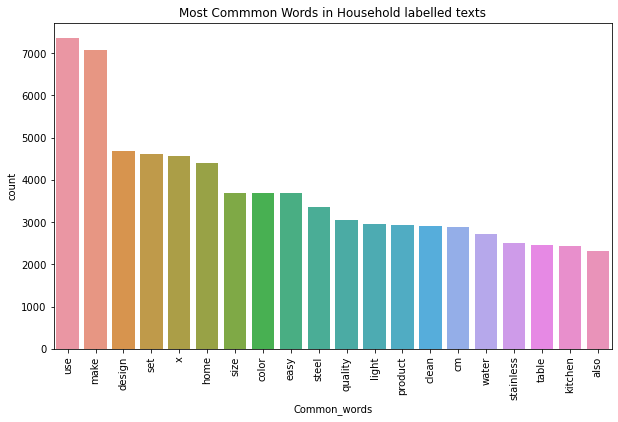

In [114]:
# Visualize Most Commmon Words in Household labelled texts
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_household, ax=ax)
plt.title("Most Commmon Words in Household labelled texts")
plt.xticks(rotation='vertical');

 ### Finding common words for book labelled texts

In [115]:
#Most common books words
top = Counter([item for sublist in Books_sent['Text'] for item in sublist])
freq_books = pd.DataFrame(top.most_common(20))
freq_books.columns = ['Common_words','count']
freq_books.style.background_gradient(cmap='flare')

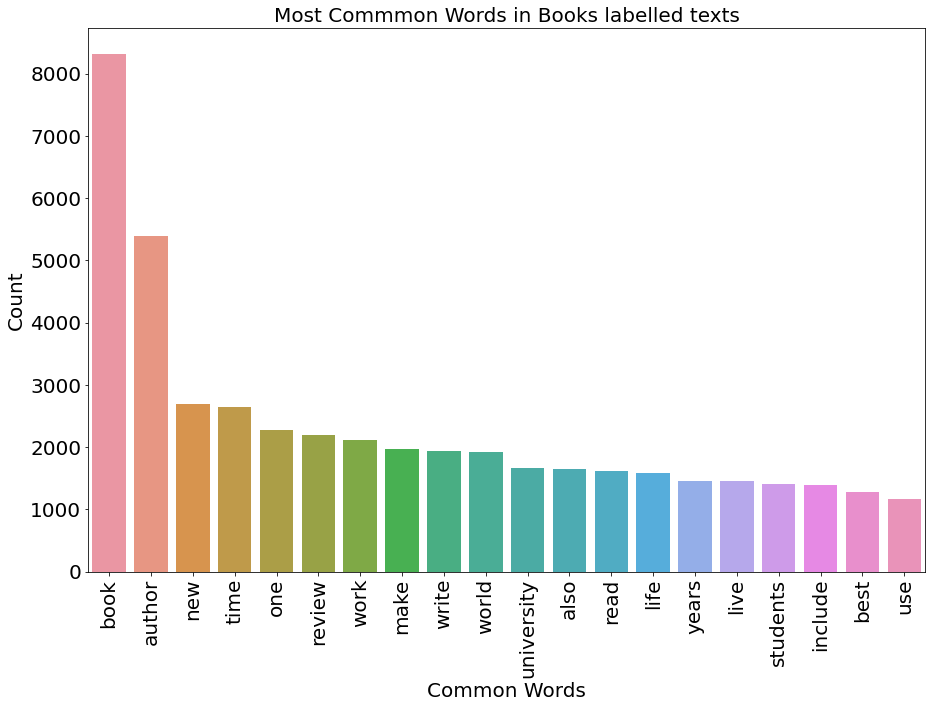

In [116]:
# Visualize Most Commmon Words in Books labelled texts
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Common_words', y='count', 
            data=freq_books, ax=ax)
plt.title("Most Commmon Words in Books labelled texts",fontsize=20)
plt.ylabel ('Count', fontsize=20) 
plt.xlabel ('Common Words', fontsize=20) 

plt.xticks(rotation='vertical',fontsize=20);
plt.yticks(fontsize=20);

 ### Finding common words for Clothing and Accessories labelled texts

In [117]:
#Most common clothing and accessories words
top = Counter([item for sublist in Clothing_sent['Text'] for item in sublist])
freq_clothing = pd.DataFrame(top.most_common(20))
freq_clothing.style.background_gradient(cmap='flare')

#freq_clothing.columns = ['Common_words','count']
freq_clothing.columns = ["Common_words","count"]



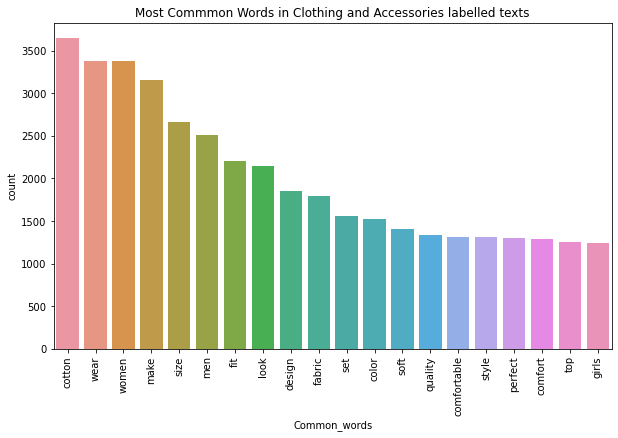

In [118]:
# Visualize Most Commmon Words in Clothing & Accessories labelled texts
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_clothing, ax=ax)
plt.title("Most Commmon Words in Clothing and Accessories labelled texts")
plt.xticks(rotation='vertical');

 ### Finding common words for Electronics labelled texts

In [119]:
# Most common clothing and accessories words
top = Counter([item for sublist in Electronics_sent['Text'] for item in sublist])
freq_electronics = pd.DataFrame(top.most_common(20))
freq_electronics.columns = ['Common_words','count']
freq_electronics.style.background_gradient(cmap='flare')

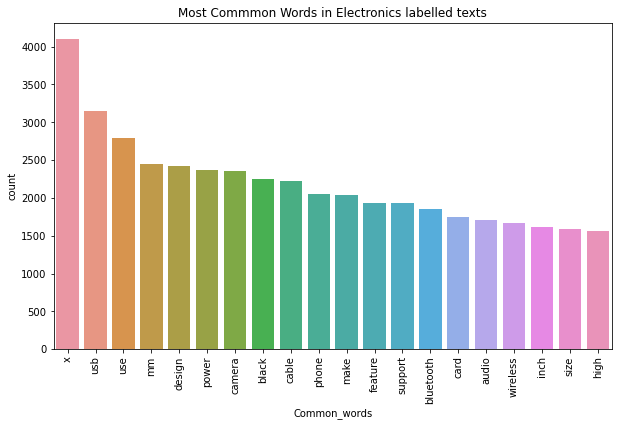

In [120]:
# Visualize Most Commmon Words in Electronics labelled texts
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_electronics, ax=ax)
plt.title("Most Commmon Words in Electronics labelled texts")
plt.xticks(rotation='vertical');

## Create Wordcloud where the more common words appear bigger in size

In [121]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

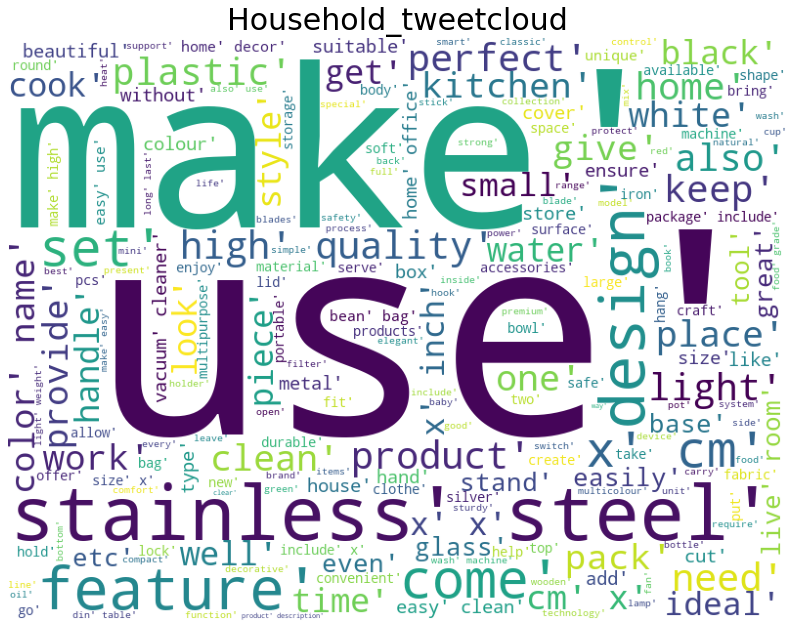

In [122]:
show_wordcloud(Household_sent, "Household_tweetcloud")


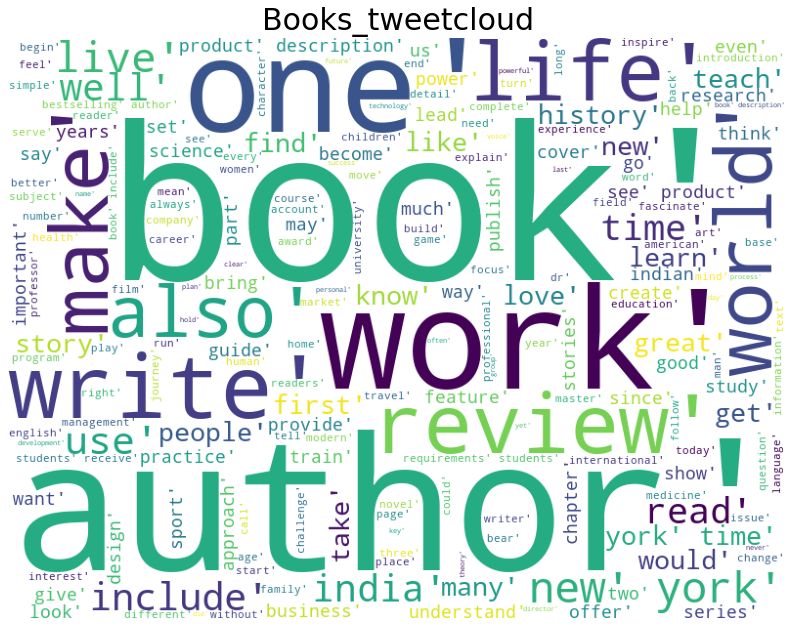

In [123]:
show_wordcloud(Books_sent, "Books_tweetcloud")


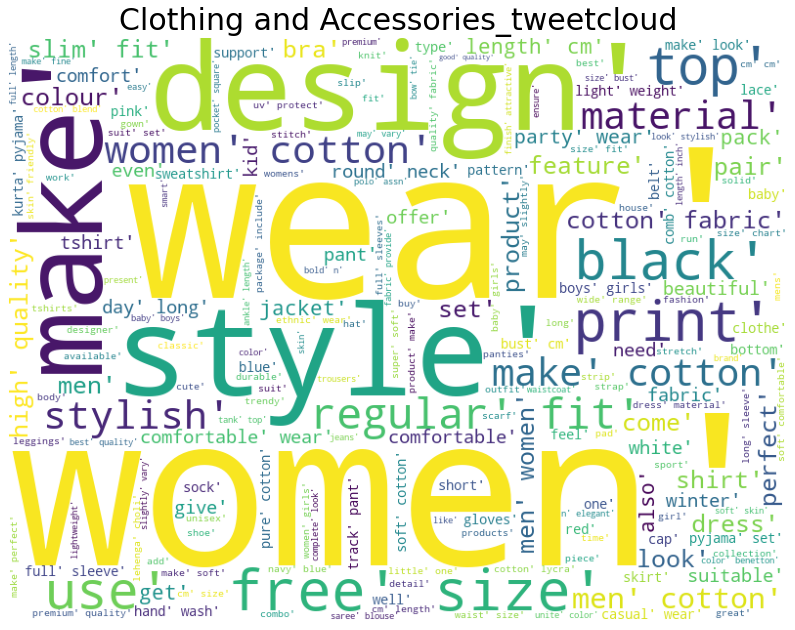

In [124]:
show_wordcloud(Clothing_sent, "Clothing and Accessories_tweetcloud")


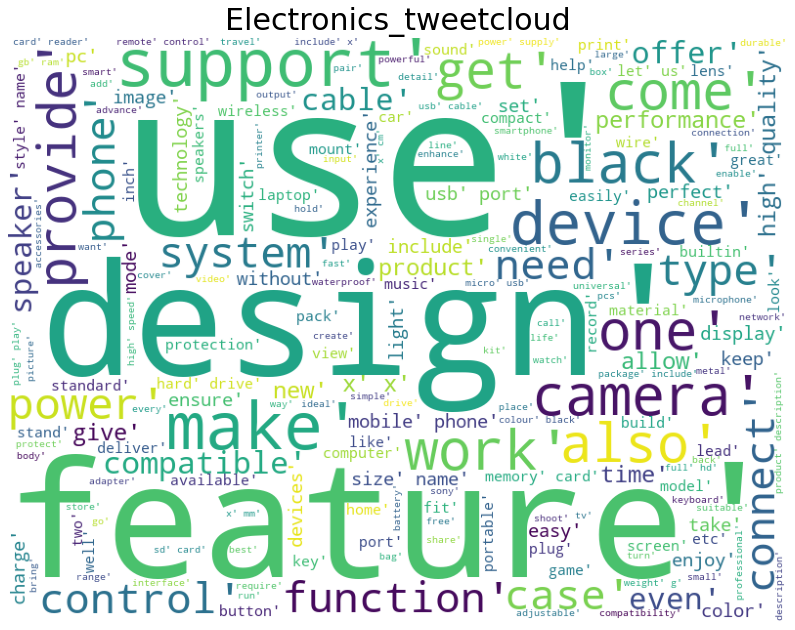

In [125]:
show_wordcloud(Electronics_sent, "Electronics_tweetcloud")


In [126]:
# function to create labeled barplots
def labeled_barplot(data, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data[feature],
        palette=pallet,
        order=data[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} Label'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [127]:
use_new_real_data_new.head(2)

Label  \
0  Household   
1  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Text  
0  [styleys, work, iron, coat, rack, hanger, creative, fashion, bedroom, hang, clothe, shelve, work, iron, rack, stand, coat, rack, black, color, name, black, styleys, coat, stand, great, home, room, limit, space, one, stand, rack, take, less, space, compare, drawers, cupboards, easy, guests, keep, items, especially, bag, scarves, visit, always, keep, eye, easily, grab, leave, make, smart, decor, piece, home, room, occupy, stand, show, stylish, handbags, accessories, hangman, achievement, medals, dimension, cm, x, cm, x, cm, weight, kg, material, steel, colour, white, black, pink, hook, straight, peg, suitable, hang, coat, clothe, scarves, handbags, hat, accessories]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                       [cuisinart, ccobkn, deluxe, electric, opener, black, size, none, color, name, black, style, convenience, power, come, together, cuisinart, electric, open, chrome, accent, elegant, contour, fit, nicely, modern, countertop, appliances, easy, singletouc]

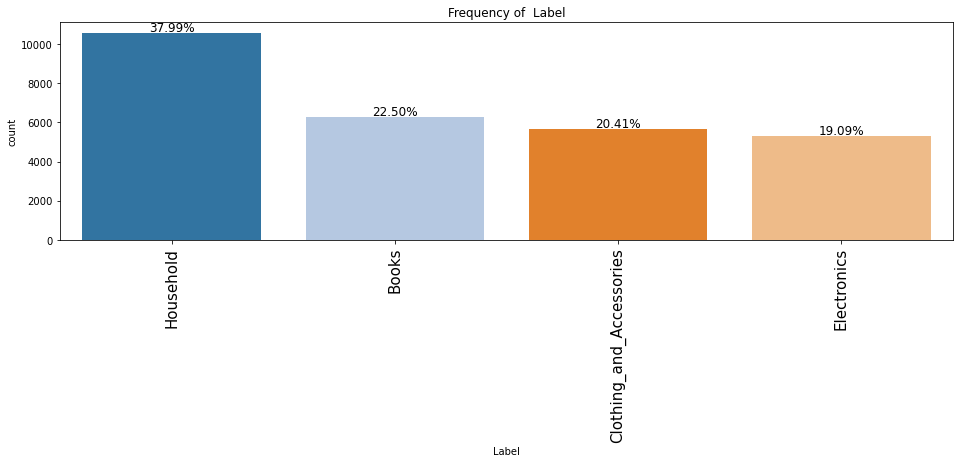

In [128]:
#Visualize the top 20 users by number of tweets
labeled_barplot(use_new_real_data_new, 'Label', '','tab20')

Majority of the labels are 'Household' (37.99%), followed by 'Books'(22.50%), then 'Clothing & Accessories' (20.41%), and the least label is 'Electronics' (19.09%).

In [129]:
use_new_real_data_new.info()   # Confirm information of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27802 entries, 0 to 50425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   27802 non-null  object
 1   Text    27802 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


## **Building the model based on CountVectorizer and Classifiers**


In [130]:
data_2=new_real_data_new_mod.copy()

In [131]:
data_2['Label'].replace({'Clothing & Accessories': 'Clothing_and_Accessories'},inplace=True)

In [132]:
new_data_2=data_2.copy()

In [133]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000) # Keep only 2000 features as number of features will increase the processing time.


In [134]:
new_data_2.head(1)

Label  \
0  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Text  
0  styleys work iron coat rack hanger creative fashion bedroom hang clothe shelve work iron rack stand coat rack black color name black styleys coat stand great home room limit space one stand rack take less space compare drawers cupboards easy guests keep items especially bag scarves visit always keep eye easily grab leave make smart decor piece home room occupy stand show stylish handbags accessories hangman achievement medals dimension cm x cm x cm weight kg material steel colour white black pink hook straight peg suitable hang coat clothe scarves handbags hat accessories

In [135]:
data_feat=new_data_2['Text']
data_feats=new_real_data_pipe_for_test['Text']

data_feats_clean=new_real_data_pipe_for_test_clean['Text']

In [136]:
data_features = bow_vec.fit_transform(new_data_2['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [137]:
data_features.shape

(27802, 2000)

In [138]:
new_data_2['Label'].value_counts()

Household                   10563
Books                        6256
Clothing_and_Accessories     5675
Electronics                  5308
Name: Label, dtype: int64

#### Re-label the Labels on the dataset using numbers

In [139]:
new_data_2['Label'].replace({'Household': 0, 'Books':1, 'Clothing_and_Accessories':2,'Electronics':3},inplace=True)

In [140]:
new_data_2.head()

Label  \
0      0   
1      0   
2      0   
3      2   
4      0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                      styleys work iron coat rack hanger creative fashion bedroom hang clothe shelve work iron rack stand coat rack black color name black styleys coat stand great home room limit space one stand rack take less space compare drawers cupboards easy guests keep items especially bag scarves visit always keep eye easily grab leave make smart decor piece home room occupy stand show stylish handbags accessories hangman achievement medals dimension cm x cm x cm weight kg material steel colour white black pink hook straight peg suitable hang coat clothe scarves handbags hat accessories  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cuisinart ccobkn deluxe electric opener black size none color name black style convenience power come together cuisinart electric open chrome accent elegant contour fit nicely modern countertop appliances easy singletouc  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    anchor penta amp way switch white pack anchor penta amp way switch white pack com

In [141]:
labels = new_data_2['Label']


In [142]:
labels

0        0
1        0
2        0
3        2
4        0
5        0
6        0
7        3
8        3
9        0
10       0
11       3
12       3
13       0
14       0
15       0
16       0
17       3
18       0
19       0
20       0
21       0
22       1
23       1
24       3
25       2
26       0
27       0
28       0
29       0
30       0
31       2
32       1
33       2
34       2
35       1
36       1
37       0
38       1
39       3
40       0
41       0
42       3
43       3
44       0
45       3
46       2
47       1
48       2
49       2
50       2
51       0
52       0
53       2
54       0
55       0
56       0
57       2
58       3
59       0
60       2
61       0
62       3
63       2
64       0
65       0
66       1
67       0
68       0
69       3
70       0
71       2
72       1
73       0
74       2
75       1
76       0
77       2
78       3
79       0
80       3
81       1
82       0
83       0
84       0
85       0
86       2
87       1
88       0
89       1
90       3

In [143]:
# Split data into training and testing set for raw data.

from sklearn.model_selection import train_test_split
X_train_data_feat, X_test_data_feat, y_train_data_feat, y_test_data_feat = train_test_split(data_feats, labels, test_size=0.3, random_state=42, stratify=labels)



In [144]:
# Split data into training and testing set for cleaned data.

from sklearn.model_selection import train_test_split
X_train_data_feat_clean, X_test_data_feat_clean, y_train_data_feat_clean, y_test_data_feat = train_test_split(data_feats_clean, labels, test_size=0.3, random_state=42, stratify=labels)



In [145]:
# Split data into training and testing set for (count)vectorized data..

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42, stratify=labels)

In [146]:
y_train_label=y_train.copy()
y_test_label=y_test.copy()

In [147]:
y_merged=pd.concat((y_train,y_test),axis=0)


In [148]:
y_train.shape

(19461,)

In [149]:
y_test.shape

(8341,)

In [150]:
y_merged.shape

(27802,)

In [151]:
print(y_train)

24633    0
105      1
6560     1
5871     1
7942     0
1253     2
37778    2
45597    1
47891    0
5162     1
13464    1
5808     1
13587    1
31750    0
15786    1
43680    3
10080    2
18147    2
36539    3
13216    3
11403    0
4536     3
6361     1
7510     1
26477    0
12722    2
13640    0
19068    3
36601    2
12079    0
26936    0
44434    1
16858    1
11227    3
41533    0
20821    1
25634    2
14746    0
44691    0
2756     0
6210     0
29827    3
27321    0
36230    3
11003    2
30941    3
18921    1
4285     3
19758    1
8488     1
19768    0
47237    2
8462     3
36630    0
23483    1
40672    3
40345    1
17211    3
6981     0
10949    2
12459    3
23084    2
23720    3
28579    1
462      0
16274    0
8066     1
32172    3
5810     3
15246    1
12330    1
31816    0
15420    0
17379    0
25974    0
29491    0
17363    2
45524    0
10045    1
37624    2
22907    0
301      1
4330     0
22577    1
16225    1
35463    0
4616     2
10573    3
9230     1
12027    0
9064     0

#### Create class weight to balance the dataset as some labels appear more than the other

In [152]:
from sklearn.utils import class_weight # To balance an unbalanced dataset
labelList = labels.unique()
print(labelList)
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = labels.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights
#class_weights.reindex({2: -1, 0:0, 1:1},inplace=True)

#class_weights.reindex(["0", "1", "-1"],inplace=True)
#class_weights.update({2: -1, 0:0, 1:1})
#class_weights['2'] = class_weights['-1']


#class_weights

[0 2 3 1]


{0: 0.6580043548234403,
 1: 1.2247577092511013,
 2: 1.309438583270535,
 3: 1.1110134271099745}

In [153]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_LR=LogisticRegression(class_weight=class_weights,n_jobs=-1)

model_DT= DecisionTreeClassifier(class_weight=class_weights, min_samples_leaf=1,
            min_samples_split=2)

model_RF= RandomForestClassifier(class_weight=class_weights, n_jobs=-1)

# Fitting the models using basic hyperparameters to determine which model works better

logReg = model_LR.fit(X_train, y_train)
DecTree= model_DT.fit(X_train, y_train)
RandF = model_RF.fit(X_train, y_train)


print("Logistic Regression: ", np.mean(cross_val_score(logReg, X_train, y_train, cv=10)))
print("Decision Tree: ", np.mean(cross_val_score(DecTree, X_train, y_train, cv=10)))
print("Random Forest: ", np.mean(cross_val_score(RandF, X_train, y_train, cv=10)))

Logistic Regression:  0.9124402261153877
Decision Tree:  0.8604392559032237
Random Forest:  0.9179901775256001


The Random Forest Classifier performs better based on it's cross validation score of about 92%, followed by the Logistic Regression model with a cross validation score of about 91%, while the Decision Tree Classifier gave the least score of about 86%. Thus, we will proceed with the Random Forest Classifier to build the model. 

### **Optimizing the parameter: Number of trees in the random forest model (n_estimators)**

In [154]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 20)]
base_ln

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [155]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight=class_weights, n_jobs=-1)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("Scores: ", scores)
    cv_scores.append(scores.mean())
print("Mean CV Scores: ", cv_scores)

Scores:  [0.78633796 0.79496403 0.81038027 0.79445015 0.81397739 0.81243577
 0.80421377 0.78879753 0.80524152 0.81551901]
Scores:  [0.79096045 0.79290853 0.79701953 0.81140802 0.79701953 0.77954779
 0.81294964 0.80678314 0.8036999  0.80113052]
Scores:  [0.85413457 0.85817061 0.86947585 0.87718397 0.87101747 0.86742035
 0.86485098 0.87358684 0.86382323 0.86485098]
Scores:  [0.85824345 0.87307297 0.8684481  0.86998972 0.86998972 0.87153135
 0.86536485 0.86330935 0.87153135 0.86998972]
Scores:  [0.87776066 0.87718397 0.87923947 0.89054471 0.89105858 0.88232271
 0.88540596 0.88335046 0.88951696 0.88797533]
Scores:  [0.88084232 0.88951696 0.89003083 0.88951696 0.88900308 0.8946557
 0.89105858 0.88951696 0.89208633 0.89516958]
Scores:  [0.88597843 0.89773895 0.89105858 0.90236382 0.89208633 0.89516958
 0.89568345 0.89722508 0.90441932 0.90030832]
Scores:  [0.88854648 0.89260021 0.89722508 0.90184995 0.89157246 0.9008222
 0.89825283 0.89825283 0.89362795 0.9008222 ]
Scores:  [0.88803287 0.894

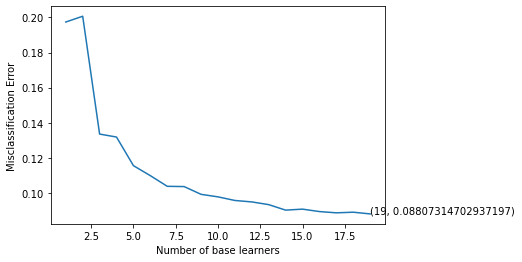

In [156]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                    #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]  #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                             #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Misclassification error is minimum for n_estimators =19 with an error of 8.7%

In [157]:
# Training the best model and calculating accuracy on test data .
clf_count_vec = RandomForestClassifier(n_estimators = optimal_learners, class_weight=class_weights, n_jobs=-1)
clf_count_vec.fit(X_train, y_train)
clf_count_vec.score(X_test, y_test)

0.9148783119530033

In [158]:
count_vec_pred =  clf_count_vec.predict(X_test)                  #saving the prediction on test data as count_vec_pred

[[2970   65   48   86]
 [ 121 1712   22   22]
 [  68    9 1613   13]
 [ 197   45   14 1336]]
0.9148783119530032


<AxesSubplot:>

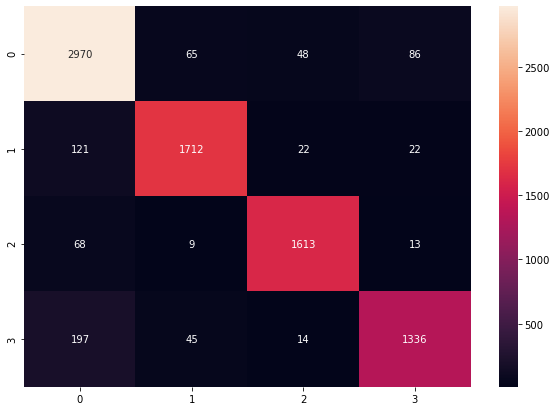

In [159]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vec_pred)

print(conf_mat)

print(metrics.f1_score(y_test, count_vec_pred,average='micro'))
lst=['0','1','2','3']
df_cm = pd.DataFrame(conf_mat, index = [i for i in lst],
                  columns = [i for i in lst])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Count vectorizer predicted with accuracy of 91.5%

### **Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

In [160]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)  

In [161]:
data_features = bow_vec.fit_transform(new_data_2['Text'])

data_features = data_features.toarray()    

#### Visualize more common words using count vectorizer

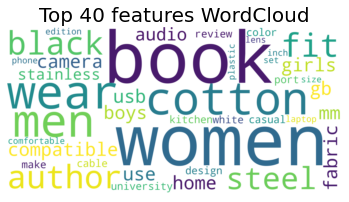

In [162]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_count_vec.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

The more common words are women, men, author, cotton, book, usb, wear, and steel for countvectorizer

# Term Frequency(TF) - Inverse Document Frequency(IDF)¶


In [163]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(new_data_2['Text'])
data_features = data_features.toarray()

data_features.shape

(27802, 2000)

In [164]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(data_features, labels, test_size=0.3, random_state=42,stratify=labels)


Data split was stratified to maintain proportionate distribution of the labels for every split and maintain the class weight.

In [165]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 20)]
base_ln

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [166]:
# K-Fold Cross - validation .
cv_scores_tf_idf = []
for b in base_ln:
    clf_tf_idf = RandomForestClassifier(n_estimators = b,class_weight=class_weights, n_jobs=-1)
    scores = cross_val_score(clf_tf_idf, X_train_tf_idf, y_train_tf_idf, cv = 10, scoring = 'accuracy')
    print("Scores: ", scores)
    cv_scores_tf_idf.append(scores.mean())
print("Mean CV Scores: ", cv_scores_tf_idf)
print("Size of Scores: ",len(cv_scores_tf_idf))

Scores:  [0.78787879 0.80061665 0.78725591 0.81654676 0.7934224  0.78571429
 0.79239466 0.80472765 0.80472765 0.79856115]
Scores:  [0.80431433 0.80781089 0.81397739 0.80472765 0.80113052 0.81603289
 0.8016444  0.80113052 0.81603289 0.81140802]
Scores:  [0.85721623 0.86279548 0.86176773 0.86073998 0.86176773 0.84994861
 0.87101747 0.86742035 0.86793422 0.8705036 ]
Scores:  [0.8700565  0.86279548 0.85971223 0.8602261  0.87307297 0.87410072
 0.87204522 0.8663926  0.86279548 0.85868448]
Scores:  [0.8751926  0.88180884 0.89208633 0.88283659 0.88129496 0.87667009
 0.88283659 0.87872559 0.89362795 0.89208633]
Scores:  [0.88032871 0.89105858 0.89208633 0.88797533 0.88335046 0.88951696
 0.89362795 0.88797533 0.89260021 0.89157246]
Scores:  [0.8895737  0.9008222  0.89568345 0.89260021 0.88746146 0.89362795
 0.89619733 0.89516958 0.89773895 0.90030832]
Scores:  [0.89265537 0.8946557  0.89362795 0.90750257 0.89414183 0.89825283
 0.8987667  0.89773895 0.90030832 0.90698869]
Scores:  [0.89522342 0.8

In [167]:
cv_scores_tf_idf_median=np.median(cv_scores_tf_idf)
cv_scores_tf_idf_median                             # Median of the cv scores to overcome wrong values associated with outliers.

0.901547087225663

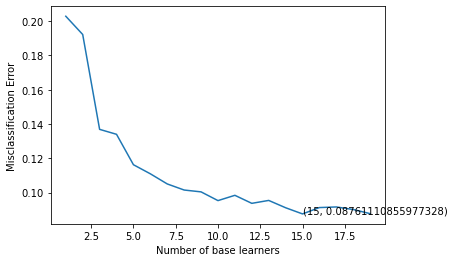

In [168]:
# plotting the error as k increases
error_tf_idf = [1 - x for x in cv_scores_tf_idf]                                              #error corresponds to each nu of estimator
optimal_learners_2 = base_ln[error_tf_idf.index(min(error_tf_idf))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error_tf_idf)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners_2, min(error_tf_idf))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

n-estimators = 15 as optimal_learner with misclassification error of 8.76% for tf-idf vectorizer.

In [169]:
# Training the best model and calculating error on test data .
clf_tf_idf = RandomForestClassifier(n_estimators = optimal_learners_2, class_weight=class_weights, n_jobs=-1)
clf_tf_idf.fit(X_train_tf_idf, y_train_tf_idf)
clf_tf_idf.score(X_test_tf_idf, y_test_tf_idf)

0.9167965471765975

tf-idf vectorizer predicted with accuracy of 91.7%

In [171]:
result_tf_idf = clf_tf_idf.predict(X_test_tf_idf) # Save test data prediction as result_tf_idf

[[2975   59   46   89]
 [ 108 1728   18   23]
 [  64   12 1615   12]
 [ 201   52   10 1329]]
0.9167965471765975


<AxesSubplot:>

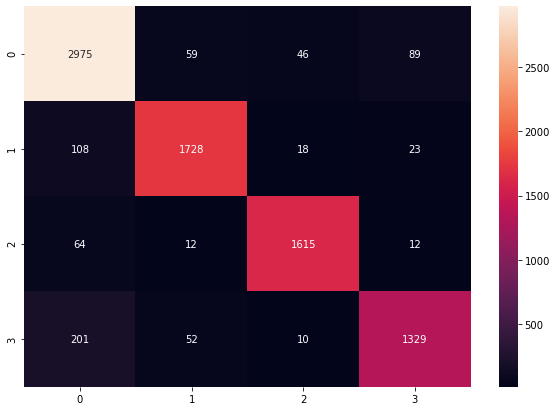

In [172]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat_tf_idf = confusion_matrix(y_test_tf_idf, result_tf_idf)

print(conf_mat_tf_idf)

print(metrics.f1_score(y_test_tf_idf, result_tf_idf,average='micro'))
lst=['0','1','2','3']
df_cm = pd.DataFrame(conf_mat_tf_idf, index = [i for i in lst],
                  columns = [i for i in lst])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

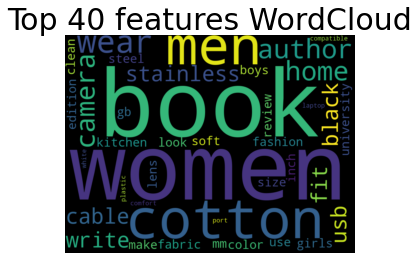

In [173]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat_tf_idf=clf_tf_idf.feature_importances_
features_tf_idf=np.argsort(feat_tf_idf)[::-1]
for i in features_tf_idf[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

More common words using tf-idf are book, women, cotton, men, camera, black, fit, usb, author, home, stainless, wear, and write.

In [174]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


### Predictions based on test set with visualizations on dataframe

In [175]:
tf_idf_predicted = clf_tf_idf.predict(X_test_tf_idf)
print(classification_report(y_test_tf_idf , tf_idf_predicted , target_names = ['0','1','2','3']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3169
           1       0.93      0.92      0.93      1877
           2       0.96      0.95      0.95      1703
           3       0.91      0.83      0.87      1592

    accuracy                           0.92      8341
   macro avg       0.92      0.91      0.92      8341
weighted avg       0.92      0.92      0.92      8341

Accuracy of the model is :  0.9167965471765975


TF-IDF Vectorizer predicted the test data with 92% accuracy, precision, recall, and f1-score. 

In [207]:
print(classification_report(y_test, count_vec_pred , target_names = ['0','1','2','3']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vec_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3169
           1       0.94      0.91      0.92      1877
           2       0.95      0.95      0.95      1703
           3       0.92      0.84      0.88      1592

    accuracy                           0.91      8341
   macro avg       0.92      0.91      0.91      8341
weighted avg       0.92      0.91      0.91      8341

Accuracy of the model is :  0.9148783119530033


Count Vectorizer predicted the test data with 91% accuracy, recall, and f1-score; and 92% precision score.

**Therefore, TF-IDF Vectorizer predicted with slightly higher accuracy, recall and f1-score.**
**The closeness in the scores for each of the vectorizer is due to the properly assigned class weights**

### View the predicted test data in  dataframes showing original and clean texts, and predictions

In [197]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(X_test_data_feat.tolist(),columns =['X_test'])
df['Cleaned Text'] = X_test_data_feat_clean.tolist()

df['y_test'] = y_test.tolist()

df['count_vectorizer_predicted'] = count_vec_pred
df['tf_idf_predicted'] = tf_idf_predicted
df.sample(n=50)

X_test  \
6383                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Graceway Unisex Fingerless Convertible Gloves (5G14, Black) This is a uniquely styled fingerless convertible gloves made out of mix wool for both men & women. Designed with black colour this gloves is comfortable, soft and easy to maintain.   
4228                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [198]:
df['y_test'].replace({0:'Household', 1: 'Books', 2: 'Clothing & Accessories', 3:'Electronics'}, inplace=True)

df['count_vectorizer_predicted'].replace({0:'Household', 1: 'Books', 2: 'Clothing & Accessories', 3:'Electronics'}, inplace=True)
df['tf_idf_predicted'].replace({0:'Household', 1: 'Books', 2: 'Clothing & Accessories', 3:'Electronics'}, inplace=True)

df.sample(n=50)

X_test  \
924                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             VIBHAVARI Men's Cotton Silk Tie, Pocket Square and Cufflinks Set, Free Size(Pink, pnkgrysqrset31) Wearing an elegant man tie is an effective way to make you look charming and energetic. The tie is often the centerpiece of the dress, it's important to choose your tie wisely. We provide not only products, but also the responsibility. We focus on ties for many years. We have an enormous selection of ties to choose from, you can find the most elegant necktie designs and colors for each season of the year. We are true tie aficionados.   
3327                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [199]:
#df['X_TEST'] = inverse_transform(X_test)

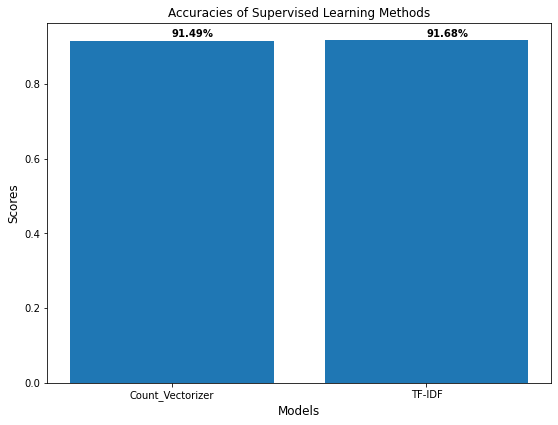

In [200]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vec_pred),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('Scores',fontsize= 12)    # y axis label
ax.set_xlabel('Models',fontsize= 12)    # x axis label
ax.set_title('Accuracies of Supervised Learning Methods')  # title
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

**TF-IDF Vectorizer predicted with overall accuracy of 91.68%, wwhile count vectorizer predicted with overall accuracy score of 91.49%. Thus, TF-IDF vectorizer gave a more accurate prediction**

### Predictions using further test sets created from original dataset with visualizations on dataframes

In [201]:
new_test_data_mod_count=new_test_data_mod.copy()
new_test_data_mod_tf=new_test_data_mod.copy()


new_test_data_mod_count_display=new_test_data_mod.copy()
new_test_data_mod_tf_display=new_test_data_mod.copy()

In [202]:
data_features_test_count=bow_vec.transform(new_test_data_mod_count['Text']) # Using Count vectorizer
data_features_test_count = data_features_test_count.toarray() 

count_vec_new_test_pred =  clf_count_vec.predict(data_features_test_count)                  #saving the prediction on test data as a result

In [203]:
data_features_test_tf=vectorizer.transform(new_test_data_mod_tf['Text']) # Using TF-IDF
data_features_test_tf = data_features_test_tf.toarray() 

tf_idf_new_test_predicted = clf_tf_idf.predict(data_features_test_tf)


In [204]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df_2 = pd.DataFrame(new_test_data_display,columns =['Text'])
df_2['Cleaned Text'] = new_test_data_mod_count
df_2['new_count_vectorizer_predicted'] = count_vec_new_test_pred
df_2['tf_idf_predicted'] = tf_idf_new_test_predicted


In [205]:
df_2.head()

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None                                                                                 |                            Color Name:Black   Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [206]:
df_2['new_count_vectorizer_predicted'].replace({0:'Household', 1: 'Books', 2: 'Clothing & Accessories', 3:'Electronics'}, inplace=True)
df_2['tf_idf_predicted'].replace({0:'Household', 1: 'Books', 2: 'Clothing & Accessories', 3:'Electronics'}, inplace=True)

df_2.sample(n=50)

Text  \
15596                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### **Conclusion**:

- **The dataset has unbalanced label which were balanced using class weight. Majority of the labels are Household, while the least label is Electronics.**
- **Logistic Regression, Decision Tree, and Random Forest Classifier were used to train the data, but Random Forest Classifier performed better with accuracy of 92%. So, Random Forest Classifier model was built and used for label prediction.** 
- **The TF-IDF vectorizer predicted with slightly higher overall accuracy compared to the count vectorizer.**


### **Summary and Recommendations**:

- We used a dataset which has **Text in text format and their labels aslo in text format requiring feature engineering and cleaning to get the appropriate labels. So, the given labels are seven in number instead of four and are required to be scaled from 0 to 3.**
- The goal was to **build a model for text-classification**.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on the different labels.
- The **pre-processed data is converted to numbers (vectorized) using countvectorizer and tf-idf vectorizer**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase in the overall accuracy.**
- After building the classification model, we **predicted the results for the test data and predicted further test data developed.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building**  
- We can also increase the **max_feature parameter** in the vectorizer. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.